# Bienvenue !
---

Bienvenue dans l'outil de prédiction du taux de conversion pour les campagnes publicitaires .
Ce modèle a été conçu pour aider les agences marketing à optimiser l'efficacité de leurs campagnes en prédisant le taux de conversion à partir de données historiques.

En anticipant les performances, les agences peuvent mieux allouer leurs budgets publicitaires et maximiser leur retour sur investissement (ROI).

# Sommaire
---


- [1. Importation des bibliothèques](#importation)
- [2. Chargement et exploration des données](#chargement)
- [3. Nettoyage des données](#preparation)
- [3. Visualisation des données](#preparation)
- [4. Modélisation classique (Machine learning)](#modelisation)
- [5. Modélisation séquentielle (Deep learning)](#evaluation)
- [6. Conclusion](#conclusion)

## **Étape 1 : Importer les bibliothèques**
---

 *Nous commençons par importer les bibliothèques nécessaires pour le traitement et la visualisation des données.*

In [4]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

✅ **Ce qu'on a fait :**  
- Importé toutes les bibliothèques nécessaires.

➡️ **Ce qu'on va faire ensuite :**  
- Charger les données et explorer le dataset.

## **Étape 2 : Chargee et explorer les données**
---
**1.Chargement de données :**

*Nous montons Google Drive pour accéder au fichier de données et le charger dans un DataFrame.*

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_path = '/content/drive/My Drive/Ff/Social_Media_Advertising.csv'
data = pd.read_csv(data_path)

**2.Exploration de données :**

Nous explorons les informations générales sur les données pour mieux comprendre leur structure.

In [7]:
print("\nInformations sur le DataFrame :")
print(data.info())


Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  object 
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  

In [8]:
print("\nTypes de données :")
print(data.dtypes)


Types de données :
Campaign_ID           int64
Target_Audience      object
Campaign_Goal        object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost     object
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
Company              object
dtype: object


In [9]:
print("\nColonnes disponibles :")
print(data.columns)


Colonnes disponibles :
Index(['Campaign_ID', 'Target_Audience', 'Campaign_Goal', 'Duration',
       'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost', 'ROI',
       'Location', 'Language', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment', 'Date', 'Company'],
      dtype='object')


In [10]:
print("\nAperçu des 5 premières lignes :")
print(data.head())


Aperçu des 5 premières lignes :
   Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0       529013       Men 35-44    Product Launch  15 Days    Instagram   
1       275352     Women 45-60  Market Expansion  15 Days     Facebook   
2       692322       Men 45-60    Product Launch  15 Days    Instagram   
3       675757       Men 25-34    Increase Sales  15 Days    Pinterest   
4       535900       Men 45-60  Market Expansion  15 Days    Pinterest   

   Conversion_Rate Acquisition_Cost       ROI     Location Language  Clicks  \
0             0.15          $500.00  5.790000    Las Vegas  Spanish     500   
1             0.01          $500.00  7.210000  Los Angeles   French     500   
2             0.08          $500.00  0.430000       Austin  Spanish     500   
3             0.03          $500.00  0.909824        Miami  Spanish     293   
4             0.13          $500.00  1.422828       Austin   French     293   

   Impressions  Engagement_Score Customer_Segme

**Résumé rapide :**

> Nous constatons que certaines colonnes sont de type object alors qu'elles devraient être numériques ou catégorielles. Nous allons procéder à leur nettoyage.


✅ **Ce qu'on a fait :**  
- Charger les données et explorer le dataset.

➡️ **Ce qu'on va faire ensuite :**  
- Préparer et nettoyer les données

## **Étape 3 : Nettoyage des données**
---

Les données ont été nettoyées et formatées pour l’analyse : suppression de symboles, conversion des types, séparation de colonnes, harmonisation des valeurs et extraction de variables temporelles. Ces étapes assurent un jeu de données propre et prêt pour la modélisation.



> Ajouter une citation



In [11]:
data['Acquisition_Cost'] = data['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

In [12]:
data[["target_gender", "target_age"]] = data["Target_Audience"].str.split(" ", expand=True)

In [13]:
data["target_age"] = data["target_age"].str.replace("Ages", "18-60")

In [14]:
data["target_gender"] = data["target_gender"].astype("category")
data["target_age"] = data["target_age"].astype("category")

In [15]:
data["Duration"] = data['Duration'].str.rstrip(" Days")
data["Duration"] = data['Duration'].astype("int")

In [16]:
data["Channel_Used"] = data["Channel_Used"].str.replace("Twitter", "X")
data["Channel_Used"] = data["Channel_Used"].astype("category")


In [17]:
data["Location"] = data["Location"].astype("category")
data["Language"] = data["Language"].astype("category")
data["Customer_Segment"] = data["Customer_Segment"].astype("category")

In [18]:
data["Date"] = pd.to_datetime(data["Date"])

In [19]:
data["month"] = data["Date"].dt.month
data["day"] = data["Date"].dt.day
data["day_name"] = data["Date"].dt.day_name()
data["day_name"] = data["day_name"].astype("category")

## **Étape 4 : Visualisation des données**
---

Des visualisations ont été réalisées pour explorer les relations entre les variables et le taux de conversion. Les graphiques en lignes, boxplots, histogrammes et heatmaps ont permis d’identifier la répartition des données, la présence de variations selon le jour, le mois ou le canal utilisé, ainsi que les corrélations entre les variables numériques. Des tests statistiques ont également été effectués pour évaluer les dépendances entre variables catégorielles.

Text(0.5, 1.0, 'Évolution mensuelle du taux de conversion')

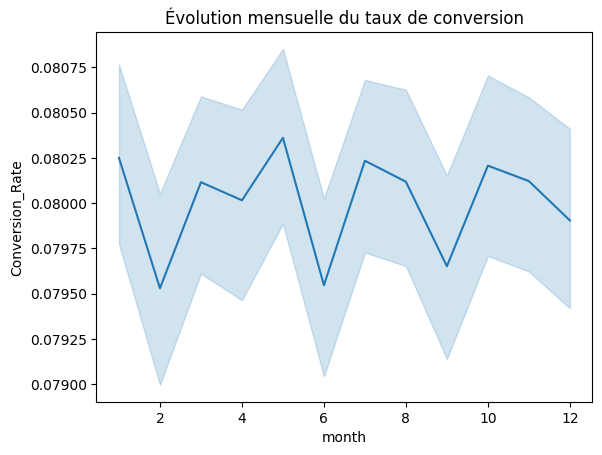

In [20]:
sns.lineplot(data=data, x='month', y='Conversion_Rate')
plt.title("Évolution mensuelle du taux de conversion")

**Interprétation**
> Le taux de conversion reste globalement constant sur l’année, ce qui peut traduire une certaine homogénéité des campagnes ou un effet limité de la saisonnalité.


<ipython-input-21-225b981359b8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='day_name', y='Conversion_Rate', palette='Set3')


Text(0.5, 1.0, 'Taux de conversion par jour de la semaine')

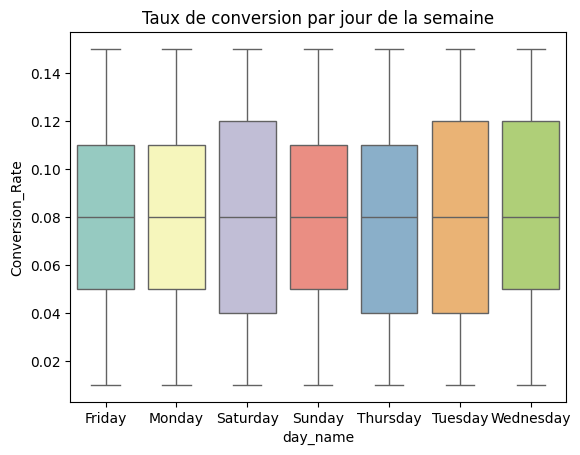

In [21]:
sns.boxplot(data=data, x='day_name', y='Conversion_Rate', palette='Set3')
plt.title("Taux de conversion par jour de la semaine")


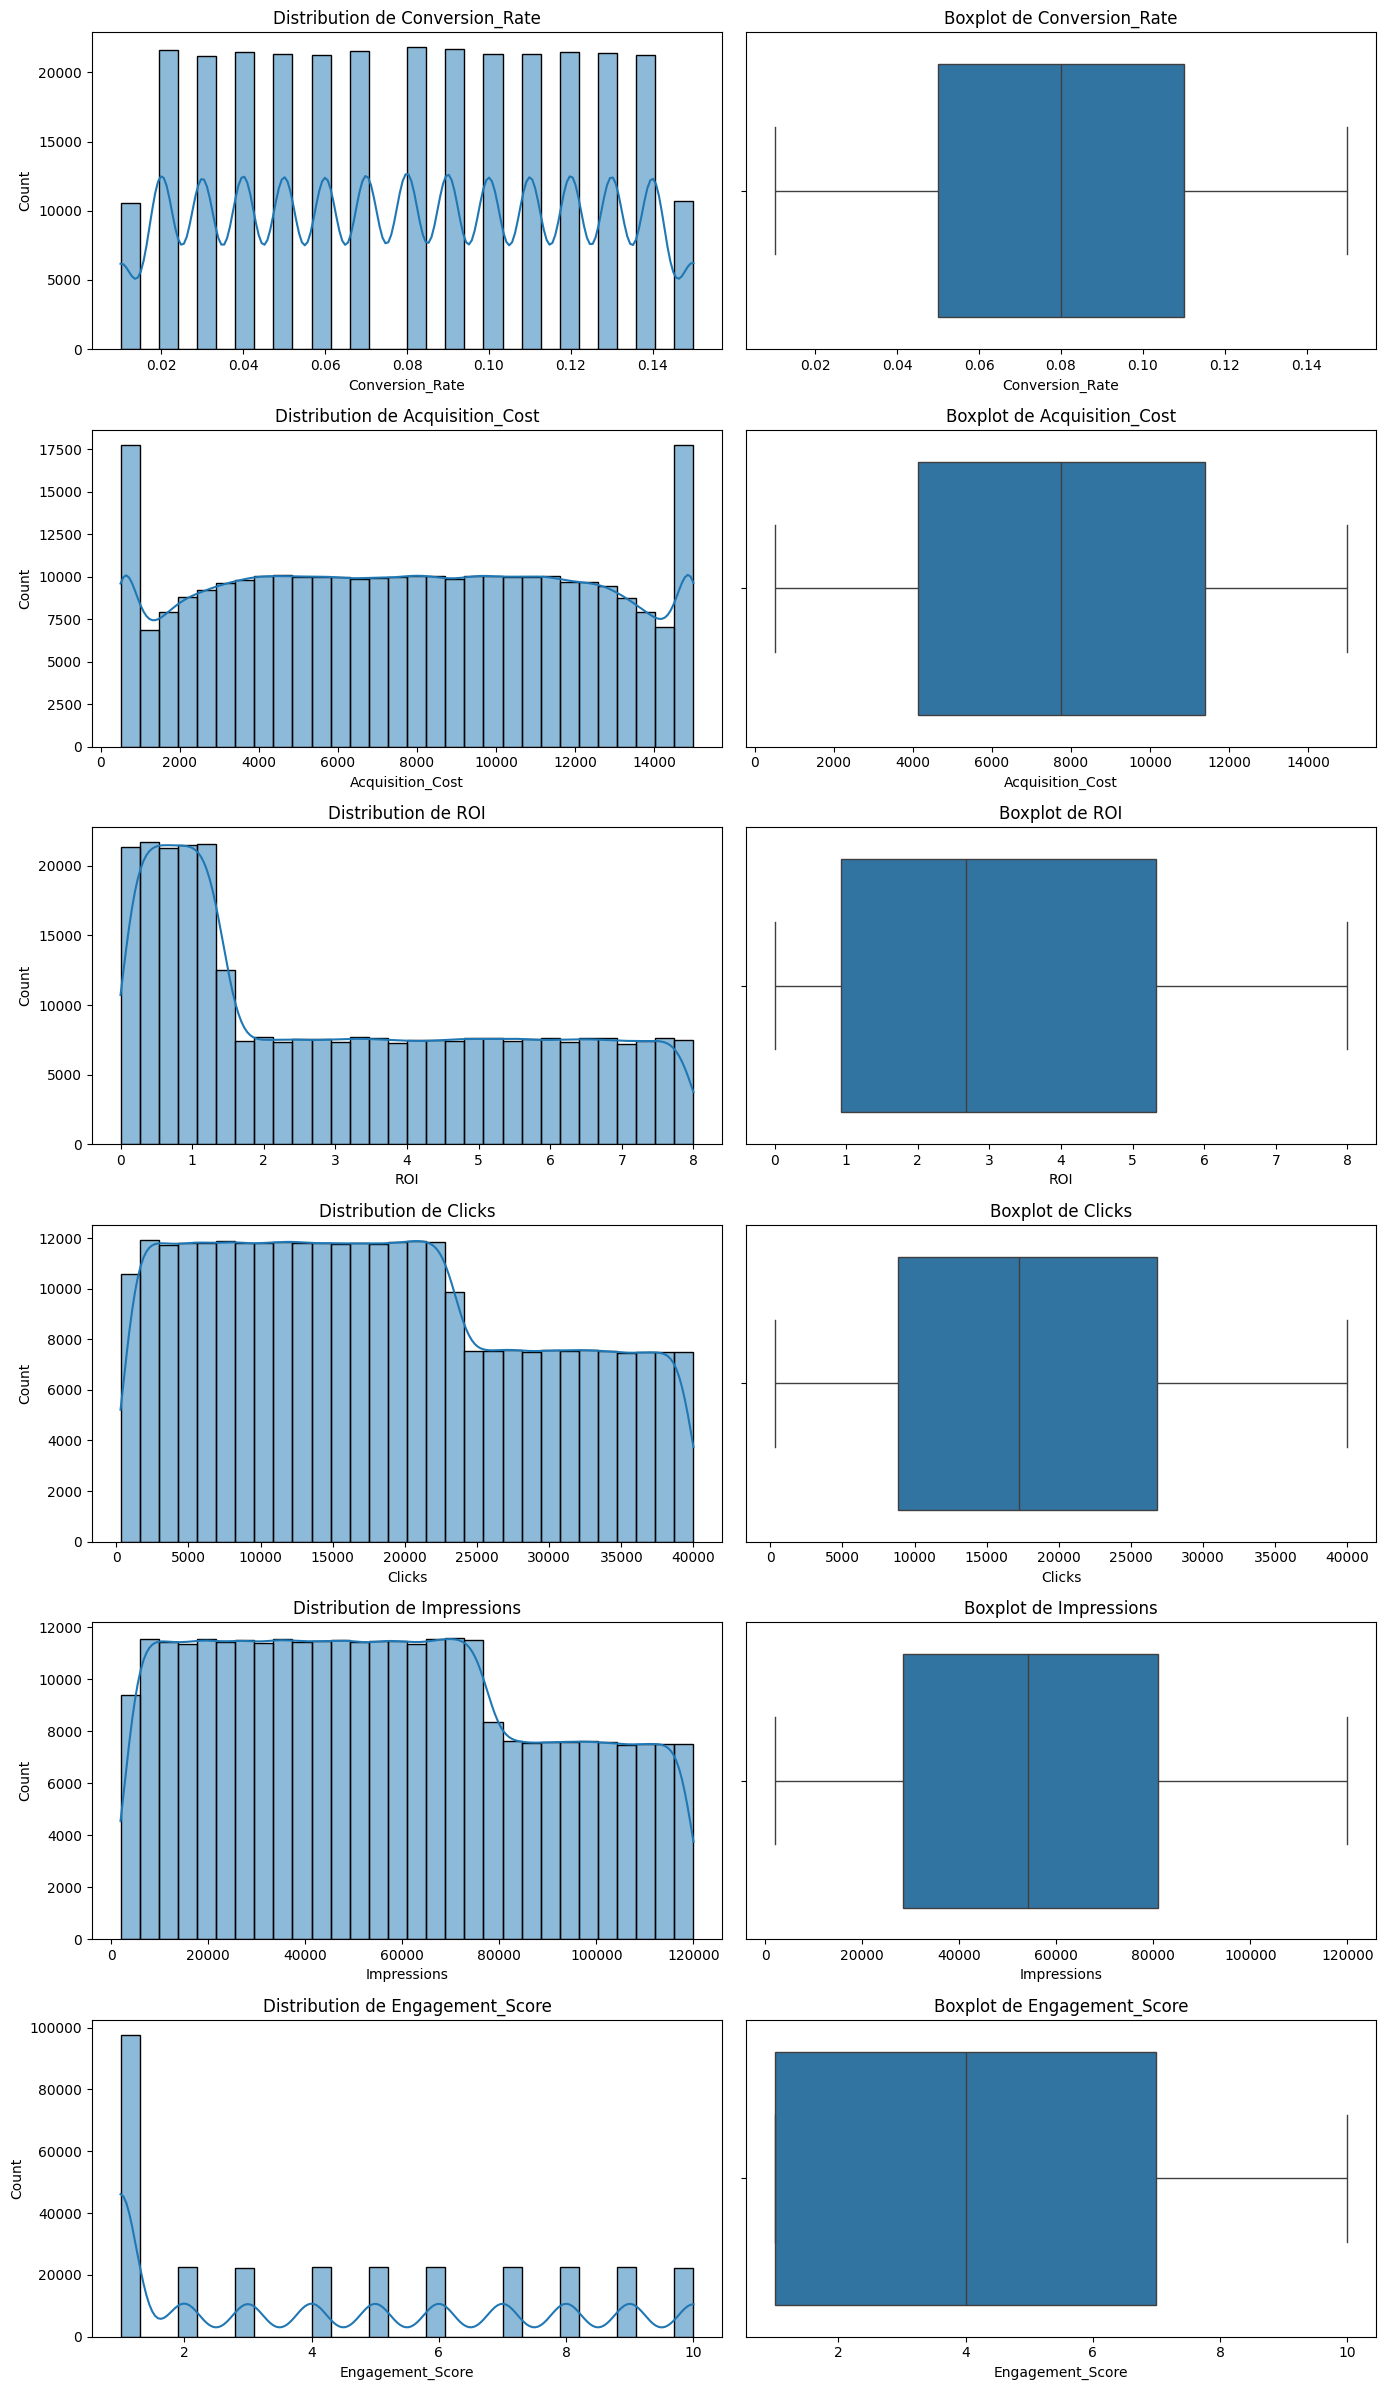

In [22]:
# Sélection des colonnes numériques
numerical_cols = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']

# Création des histogrammes et boxplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 24))
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], bins=30, ax=axes[i][0], kde=True)
    axes[i][0].set_title(f'Distribution de {col}')

    sns.boxplot(x=data[col], ax=axes[i][1])
    axes[i][1].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

<ipython-input-23-8b8566e7387e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='target_gender', y='Conversion_Rate', ax=axes[0], palette='pastel')
<ipython-input-23-8b8566e7387e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='target_age', y='Conversion_Rate', ax=axes[1], palette='Set2')


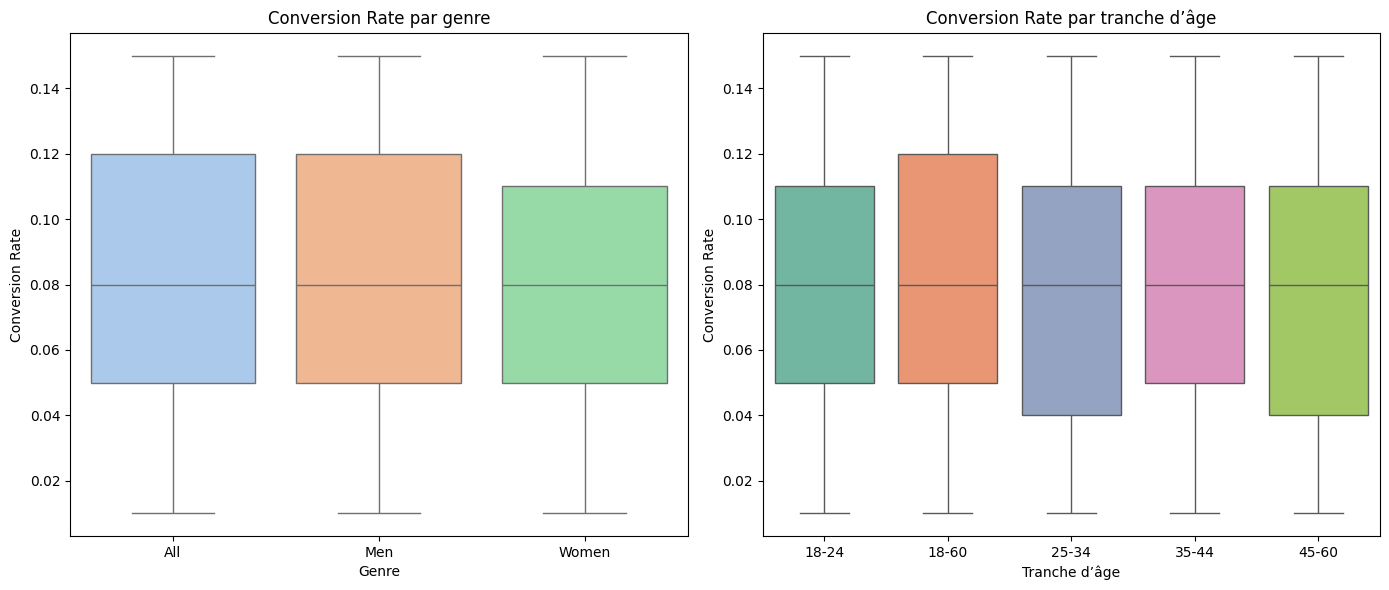

In [23]:
# Affichage des boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=data, x='target_gender', y='Conversion_Rate', ax=axes[0], palette='pastel')
axes[0].set_title("Conversion Rate par genre")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Conversion Rate")

sns.boxplot(data=data, x='target_age', y='Conversion_Rate', ax=axes[1], palette='Set2')
axes[1].set_title("Conversion Rate par tranche d’âge")
axes[1].set_xlabel("Tranche d’âge")
axes[1].set_ylabel("Conversion Rate")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Taux de conversion par canal et genre')

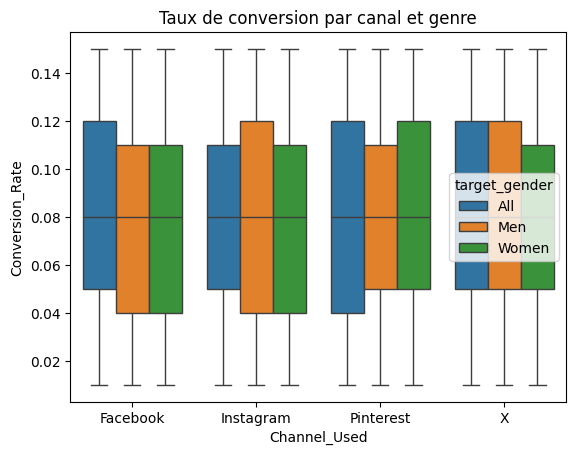

In [24]:
sns.boxplot(data=data, x='Channel_Used', y='Conversion_Rate', hue='target_gender')
plt.title("Taux de conversion par canal et genre")

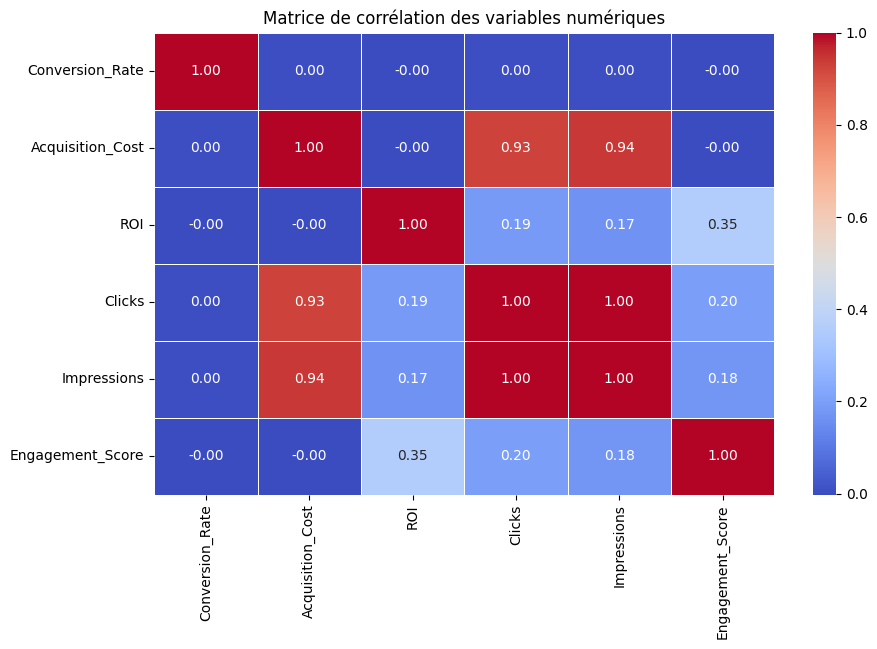

In [25]:
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

In [26]:
from scipy.stats import chi2_contingency

# Test entre le canal utilisé et le genre ciblé puisque on a un grand echantillan et des variable catégoriale
contingency_table = pd.crosstab(data['Channel_Used'], data['target_gender'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Test du Chi² entre 'Channel_Used' et 'target_gender' : p-value = {p}")

Test du Chi² entre 'Channel_Used' et 'target_gender' : p-value = 0.09172892378027998


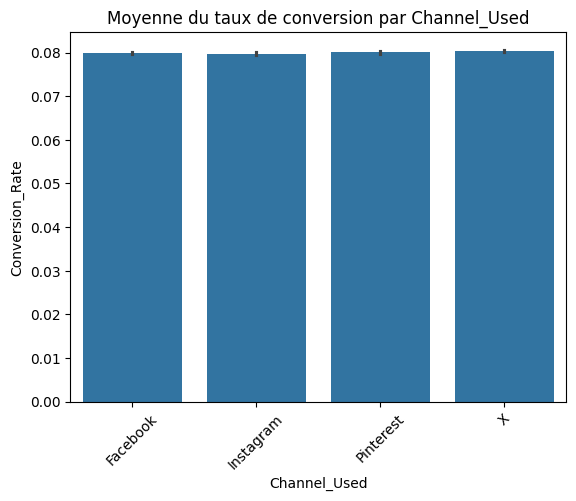

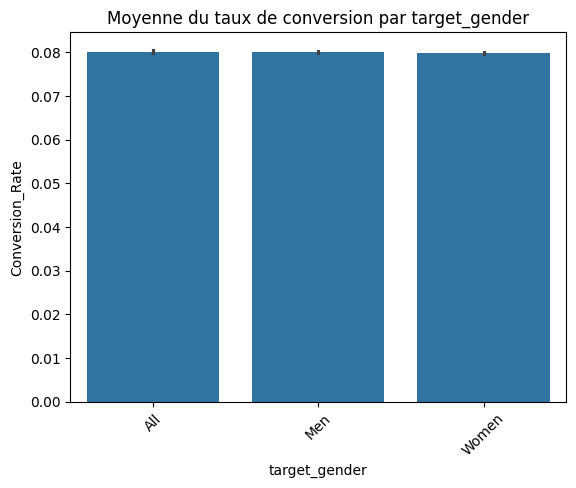

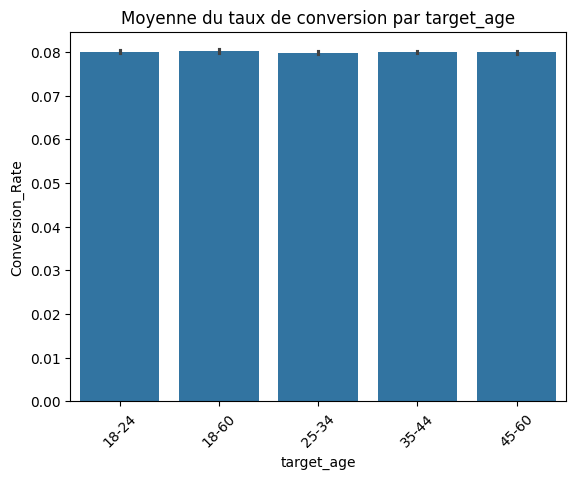

In [27]:
for col in ['Channel_Used', 'target_gender', 'target_age']:
    sns.barplot(data=data, x=col, y='Conversion_Rate')
    plt.title(f'Moyenne du taux de conversion par {col}')
    plt.xticks(rotation=45)
    plt.show()

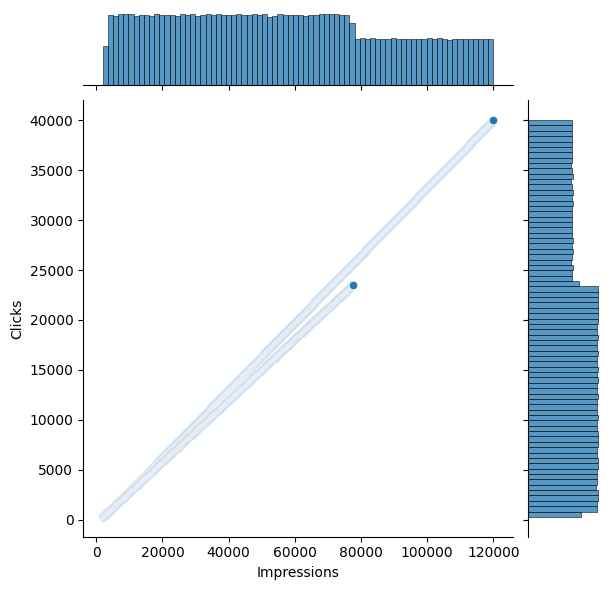

In [28]:
sns.jointplot(x='Impressions', y='Clicks', data=data, kind='scatter')

<ipython-input-29-82b688aac4f9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Channel_Used')['Conversion_Rate'].mean().sort_values().plot(kind='barh')


Text(0.5, 0, 'Conversion Rate')

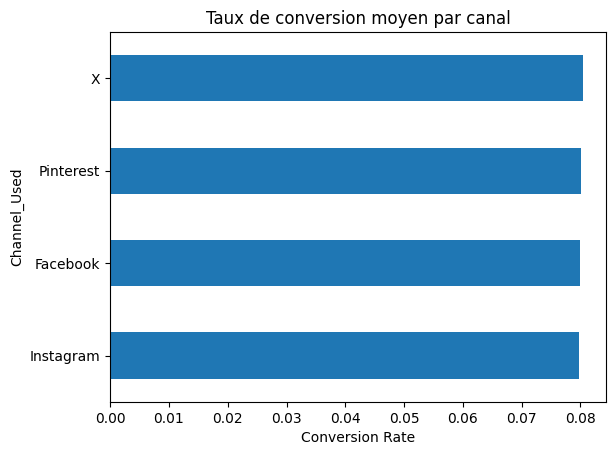

In [29]:
data.groupby('Channel_Used')['Conversion_Rate'].mean().sort_values().plot(kind='barh')
plt.title("Taux de conversion moyen par canal")
plt.xlabel("Conversion Rate")

In [30]:
# Définir X et y
X = data.drop(columns=["Conversion_Rate"])
y = data["Conversion_Rate"]

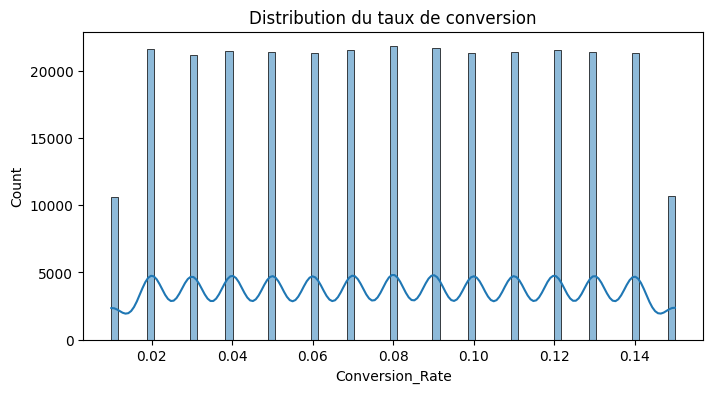

In [31]:
plt.figure(figsize=(8, 4))
sns.histplot(y, kde=True)
plt.title('Distribution du taux de conversion')
plt.show()

## **Étape 5 : Modélisation classique (Machine Learning)**
---

Dans cette étape, on entraîne des modèles prédictifs classiques comme la régression linéaire, le Random Forest ou le Gradient Boosting sur les données prétraitées.
L’objectif est de prédire le taux de conversion à partir des variables explicatives et de comparer leurs performances avec des métriques comme RMSE et R².




In [32]:
# Encodage One-Hot pour les variables catégorielles
X = pd.get_dummies(X, drop_first=True)

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Séparer les types de colonnes
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Appliquer le préprocessing
X_processed = preprocessor.fit_transform(X)


In [34]:
data_rnn = data.copy()

In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialiser les modèles
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entraîner les modèles
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Prédictions
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Fonction d'évaluation
def evaluate_model(y_true, y_pred, name):
    print(f"🔍 {name} Performance:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print("-" * 40)

# Évaluer les deux modèles
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, gb_preds, "Gradient Boosting")


🔍 Random Forest Performance:
RMSE: 0.0413
R² Score: -0.0372
----------------------------------------
🔍 Gradient Boosting Performance:
RMSE: 0.0405
R² Score: -0.0004
----------------------------------------


## **Étape 6 : Modélisation séquentielle (Deep Learning)**
---

Nous avons utilisé un modèle RNN pour capturer les dépendances temporelles dans les données, permettant ainsi de prédire le taux de conversion en tenant compte des tendances et évolutions passées. Ce modèle est particulièrement adapté pour les données séquentielles, où les observations précédentes influencent les prédictions futures.

In [36]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Colonnes
numeric_features = ['Impressions', 'Clicks', 'Engagement_Score', 'Acquisition_Cost', 'Duration']
categorical_features = ['Channel_Used', 'Location', 'Language', 'Customer_Segment', 'target_gender', 'target_age', 'day_name']
target = 'Conversion_Rate'

# Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Ajoute `sparse_output=False` pour bien avoir un array
])

# Appliquer le tri temporel
data_rnn = data.sort_values("Date").copy()

# Préprocessing combiné
preprocessor_rnn = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Appliquer la transformation
X_processed = preprocessor_rnn.fit_transform(data_rnn[numeric_features + categorical_features])

# Récupération de la target
target_data = data_rnn[target].values

# Création des séquences
def create_sequences(data, seq_length, target_data):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(target_data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X_seq, y_seq = create_sequences(X_processed, seq_length, target_data)

# Conversion pour TensorFlow
X_seq = X_seq.astype('float32')
y_seq = y_seq.astype('float32')

# Train/test separation
split_index = int(len(X_seq) * 0.8)
X_train_rnn, X_test_rnn = X_seq[:split_index], X_seq[split_index:]
y_train_rnn, y_test_rnn = y_seq[:split_index], y_seq[split_index:]


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Dimensions d'entrée
sequence_length = X_train_rnn.shape[1]  # ex: 7
n_features = X_train_rnn.shape[2]      # nombre de variables par jour

# Définir le modèle RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=64, activation='tanh', input_shape=(sequence_length, n_features)))
rnn_model.add(Dropout(0.3))
rnn_model.add(Dense(units=32, activation='relu'))
rnn_model.add(Dense(units=1))  # prédiction du taux de conversion

# Compilation
rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
rnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement du modèle
history = rnn_model.fit(
    X_train_rnn, y_train_rnn,
    validation_data=(X_test_rnn, y_test_rnn),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - loss: 0.0053 - mae: 0.0454 - val_loss: 0.0017 - val_mae: 0.0352
Epoch 2/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 0.0017 - mae: 0.0351 - val_loss: 0.0017 - val_mae: 0.0351
Epoch 3/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 0.0017 - mae: 0.0351 - val_loss: 0.0017 - val_mae: 0.0350
Epoch 4/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 0.0016 - mae: 0.0350 - val_loss: 0.0017 - val_mae: 0.0350
Epoch 5/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 0.0017 - mae: 0.0351 - val_loss: 0.0017 - val_mae: 0.0351
Epoch 6/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - loss: 0.0016 - mae: 0.0350 - val_loss: 0.0017 - val_mae: 0.0351
Epoch 7/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 0.0016 - mae: 0.0350 - val_loss: 0.0017 - val_mae: 0.0350
Epoch 8/100
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 0.0016 - mae: 0.0350 - val_loss: 0.0017 - val_mae: 0.0350
Epoch 9/

In [39]:
type(X_train_rnn)

numpy.ndarray

In [40]:
# Exemple : prédiction avec un nouveau jeu de données
nouvelle_campagne = pd.DataFrame([{
    'Impressions': 12000,
    'Clicks': 540,
    'Engagement_Score': 78,
    'Acquisition_Cost': 500.0,
    'ROI': 5.67,
    'Duration': 10,
    'Channel_Used': 'Instagram',
    'target_gender': 'Male',
    'target_age': '18-60',
    'Location': 'Urban',
    'Language': 'English',
    'Customer_Segment': 'Gen Z',
    'month': 4,
    'day': 24,
    'day_name': 'Thursday'
}])

for col in ['Campaign_ID']:
    if col not in nouvelle_campagne.columns:
        nouvelle_campagne[col] = 0

# Utiliser le preprocessor_rnn pour le modèle RNN, et non le preprocessor des modèles classiques
nc = preprocessor_rnn.transform(nouvelle_campagne)

# Remodeler les données prétraitées pour obtenir une longueur de séquence de 7
# La forme devrait être (1, seq_length, n_features) = (1, 7, 37)
# Comme nous n'avons qu'un seul point de données, nous le répétons 7 fois pour créer une séquence.
nc = np.repeat(nc, seq_length, axis=0).reshape(1, seq_length, nc.shape[1])


# Effectuer la prédiction en utilisant le modèle RNN formé (rnn_model)
prediction = rnn_model.predict(nc)

# Clipsez la prédiction pour qu'elle soit comprise dans la plage valide (0-100)
prediction = np.clip(prediction, 0, 100)

# Afficher la prédiction
print(f"Taux de conversion prédit : {prediction[0][0]:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Taux de conversion prédit : 0.08%


# Conclusion

Ce projet a permis de développer un modèle pour prédire le taux de conversion des campagnes marketing en utilisant des techniques de machine learning et de deep learning. L'approche combinée permet d'optimiser les stratégies marketing et d'améliorer le retour sur investissement en anticipant les performances des campagnes avant leur lancement.